<h1> Prediction Using Supervised Learning </h1>

 <B> By N Prem Sai Sameer </B> 

TASK 1 - Predict the percentage of an student based on the no. of study hours.<br>

This is a simple linear regression task as it involves just 2 variables.

In [7]:
#importing all libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:
# The following command imports the CSV dataset using pandas:
dataset = pd.read_csv("/home/prem/PycharmProjects/GRIP_Internships/task1/data")

In [13]:
# Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
print("The dimension of given data :",dataset.shape)

# To see the statistical details of the dataset, we can use describe():
print("Data Description \n",dataset.describe())

The dimension of given data : (25, 2)
Data Description 
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


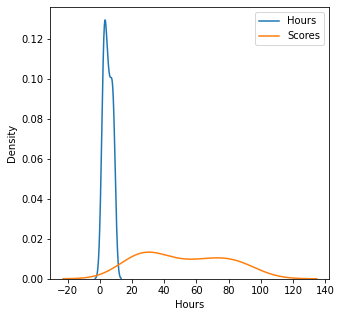

In [14]:
# Density plot
plt.figure(figsize=[5, 5])
plt.tight_layout()
sns.kdeplot(data=dataset, x="Hours",label= "Hours")
sns.kdeplot(data=dataset, x="Scores",label="Scores")
plt.legend()
plt.show()

<h2>Preparing The Dataset </h2>

In [15]:
X = dataset.iloc[:, :-1].values # Predictar variable
y = dataset.iloc[:, 1].values # Target variable

# Data is splited into 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<h2> Training the Algorithm </h2>

In [16]:
#Model Creation 
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # training the algorithm

# To retrieve the intercept:
print("y = mx + c")
print("(c)Intercept of the model :",regressor.intercept_)

# For retrieving the slope:
print("(m)Coefficent of the model",regressor.coef_)

y = mx + c
(c)Intercept of the model : 2.018160041434683
(m)Coefficent of the model [9.91065648]


<h2> Regression Plots </h2>

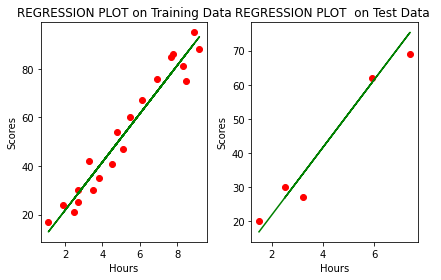

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1)

plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("REGRESSION PLOT on Training Data")
plt.xlabel("Hours")
plt.ylabel("Scores")


plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regressor.predict(X_test), color = "green")
plt.title("REGRESSION PLOT  on Test Data ")
plt.xlabel("Hours")
plt.ylabel("Scores")

fig.tight_layout()
plt.show()

<h2> Making Predictions </h2>

<b> From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.<b>

In [18]:
# Making Predictions 
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hrs = np.array([9.25])
hrs = hrs.reshape((-1,1))

pred_score = regressor.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


<h2> Evaluating Model</h2>

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


<b> We can observe that RMSE is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.<br> This means that our algorithm did much better than base model(average score).</b>

In [22]:
#R-squared is a statistical measure of how close the data are to the fitted regression line.
print("R^2 ON Test Data",r2_score(y_test,y_pred) )

R^2 ON Test Data 0.9454906892105356


<b> R^2 is 94% which indicates our model is performing really good on test dataset. </b>